In [3]:
import geopandas as gpd
import pandas as pd
import mapclassify
import pysal
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.explore import inequality
from pysal.lib import weights
from shapely.geometry import LineString, MultiLineString, Point
import numpy as np
from geosnap.analyze import isochrones_from_id, isochrones_from_gdf, pdna_to_adj 
from geosnap.io import get_acs, get_lodes
from geosnap import DataStore
import os
from random import sample
import tobler
import pandana as pdna
import quilt3 as q3
from tobler.area_weighted import area_interpolate

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):
/opt/tljh/user/lib/python3.10/site-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for 

In [4]:
datasets = DataStore('/srv/data/geosnap')

In [5]:
sd_tracts = get_acs(datasets, county_fips='06073', years=[2021])

/opt/tljh/user/lib/python3.10/site-packages/geosnap/_data.py:16: UserWarning: Streaming data from S3. Use `geosnap.io.store_acs()` to store the data locally for better performance
  warn(warning_msg)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/util.py:275: UserWarning: Unable to find local adjustment year for 2021. Attempting from online data
  warn(
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/constructors.py:215: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


In [6]:
os.getcwd()

'/home/jupyter-gbartel2616/notes/git/project/Employment-Centers-'

In [7]:
lodes = gpd.read_parquet("/home/jupyter-gbartel2616/notes/git/project/Employment-Centers-/lodes.parquet")

In [8]:
lodes

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0
4265,060730062001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0
5937,060730083051007,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25.0,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0
5948,060730083051018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,80.0,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0
6079,060730083121001,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.0,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0
6410,060730083391005,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0


In [9]:
lodes.head()

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0


In [10]:
sd_tracts

,geoid,n_total_housing_units,n_vacant_housing_units,n_occupied_housing_units,n_owner_occupied_housing_units,n_renter_occupied_housing_units,n_housing_units_multiunit_structures_denom,n_housing_units_multiunit_structures,n_total_housing_units_sample,median_home_value,...,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,p_veterans,geometry,year
0,060730001001,566.0,31.0,535.0,485.0,50.0,566.0,24.0,566.0,1440200.0,...,21.483555,0.0,2.029391,0.839748,2.029391,3.050524,82.745472,6.997901,"MULTIPOLYGON (((-117.18984 32.75861, -117.1896...",2021
1,060730001002,680.0,65.0,615.0,591.0,24.0,680.0,32.0,680.0,1446800.0,...,7.858546,0.0,5.762934,0.000000,5.762934,2.645051,77.303754,10.216110,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",2021
2,060730002011,427.0,0.0,427.0,301.0,126.0,427.0,86.0,427.0,1204400.0,...,1.070039,0.0,8.657588,0.000000,8.657588,2.948718,81.282051,1.653696,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",2021
3,060730002012,783.0,23.0,760.0,304.0,456.0,783.0,489.0,783.0,970000.0,...,8.743169,0.0,3.122560,0.000000,3.122560,0.000000,71.321462,6.557377,"MULTIPOLYGON (((-117.17415 32.75561, -117.1739...",2021
4,060730002021,885.0,90.0,795.0,290.0,505.0,885.0,494.0,885.0,837600.0,...,14.860140,0.0,0.000000,0.000000,0.000000,9.262760,51.417769,2.272727,"MULTIPOLYGON (((-117.18241 32.74255, -117.1819...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,060730221021,779.0,14.0,765.0,569.0,196.0,779.0,43.0,779.0,1017700.0,...,16.328709,0.0,11.526147,0.000000,11.526147,2.820685,67.427804,8.751334,"MULTIPOLYGON (((-117.29552 33.10990, -117.2947...",2021
2054,060730221022,620.0,15.0,605.0,241.0,364.0,620.0,345.0,620.0,749000.0,...,5.982275,0.0,11.595273,0.000000,11.595273,2.485660,85.659656,11.078287,"MULTIPOLYGON (((-117.28155 33.11199, -117.2815...",2021
2055,060730221023,822.0,166.0,656.0,419.0,237.0,822.0,154.0,822.0,1017000.0,...,17.501088,0.0,5.267741,0.000000,5.267741,7.040998,67.201426,1.567262,"MULTIPOLYGON (((-117.30199 33.12209, -117.3019...",2021
2056,060730221024,794.0,0.0,794.0,131.0,663.0,794.0,642.0,794.0,607000.0,...,75.200642,0.0,5.939005,0.000000,5.939005,51.790831,19.412607,0.000000,"MULTIPOLYGON (((-117.29064 33.11983, -117.2906...",2021


In [11]:
# get age and education from lodes and compare to the education level for people in the acs (people living in the area)

In [87]:
demographics= sd_tracts[['p_hispanic_persons','p_native_persons','p_asian_persons','p_hawaiian_persons','p_asian_indian_persons','p_edu_hs_less','p_edu_college_greater','geoid','geometry']]

In [88]:
demographics

,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,geoid,geometry
0,21.483555,0.0,2.029391,0.839748,2.029391,3.050524,82.745472,060730001001,"MULTIPOLYGON (((-117.18984 32.75861, -117.1896..."
1,7.858546,0.0,5.762934,0.000000,5.762934,2.645051,77.303754,060730001002,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
2,1.070039,0.0,8.657588,0.000000,8.657588,2.948718,81.282051,060730002011,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
3,8.743169,0.0,3.122560,0.000000,3.122560,0.000000,71.321462,060730002012,"MULTIPOLYGON (((-117.17415 32.75561, -117.1739..."
4,14.860140,0.0,0.000000,0.000000,0.000000,9.262760,51.417769,060730002021,"MULTIPOLYGON (((-117.18241 32.74255, -117.1819..."
...,...,...,...,...,...,...,...,...,...
2053,16.328709,0.0,11.526147,0.000000,11.526147,2.820685,67.427804,060730221021,"MULTIPOLYGON (((-117.29552 33.10990, -117.2947..."
2054,5.982275,0.0,11.595273,0.000000,11.595273,2.485660,85.659656,060730221022,"MULTIPOLYGON (((-117.28155 33.11199, -117.2815..."
2055,17.501088,0.0,5.267741,0.000000,5.267741,7.040998,67.201426,060730221023,"MULTIPOLYGON (((-117.30199 33.12209, -117.3019..."
2056,75.200642,0.0,5.939005,0.000000,5.939005,51.790831,19.412607,060730221024,"MULTIPOLYGON (((-117.29064 33.11983, -117.2906..."


In [14]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

In [31]:
lodes_demos= lodes[['education_bachelors','education_hs','education_lths','education_some_college','employees_30_54','employees_55plus','employees_under_30','geoid']]

In [32]:
lodes_demos

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid
214,3266.0,1347.0,990.0,2136.0,6017.0,1722.0,2256.0,060730004002000
229,1174.0,717.0,542.0,1187.0,2650.0,970.0,652.0,060730004004000
1604,1620.0,563.0,321.0,871.0,2272.0,1103.0,632.0,060730028011010
3062,542.0,840.0,891.0,1031.0,2316.0,988.0,844.0,060730038001018
3859,3459.0,2196.0,1479.0,3853.0,8092.0,2895.0,1468.0,060730053021009
4265,1152.0,975.0,638.0,1295.0,2719.0,1341.0,940.0,060730062001000
5937,7181.0,2678.0,1747.0,4321.0,12173.0,3754.0,5185.0,060730083051007
5948,2425.0,270.0,92.0,1152.0,2794.0,1145.0,324.0,060730083051018
6079,2347.0,812.0,646.0,1426.0,3788.0,1443.0,902.0,060730083121001
6410,1957.0,662.0,371.0,1095.0,3106.0,979.0,486.0,060730083391005


In [17]:
lodes_ages=lodes[['geoid','employees_30_54','employees_55plus','employees_under_30']]

In [18]:
lodes_ages

,geoid,employees_30_54,employees_55plus,employees_under_30
214,060730004002000,6017.0,1722.0,2256.0
229,060730004004000,2650.0,970.0,652.0
1604,060730028011010,2272.0,1103.0,632.0
3062,060730038001018,2316.0,988.0,844.0
3859,060730053021009,8092.0,2895.0,1468.0
4265,060730062001000,2719.0,1341.0,940.0
5937,060730083051007,12173.0,3754.0,5185.0
5948,060730083051018,2794.0,1145.0,324.0
6079,060730083121001,3788.0,1443.0,902.0
6410,060730083391005,3106.0,979.0,486.0


In [19]:
acs_variables = ['p_hispanic_persons','p_native_persons','p_asian_persons','p_hawaiian_persons','p_asian_indian_persons','p_edu_hs_less','p_edu_college_greater']
num_classes = 10

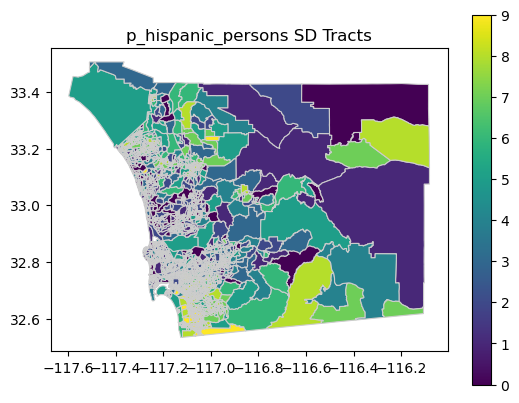

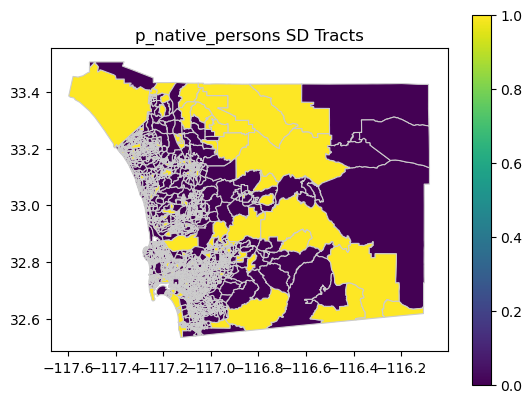

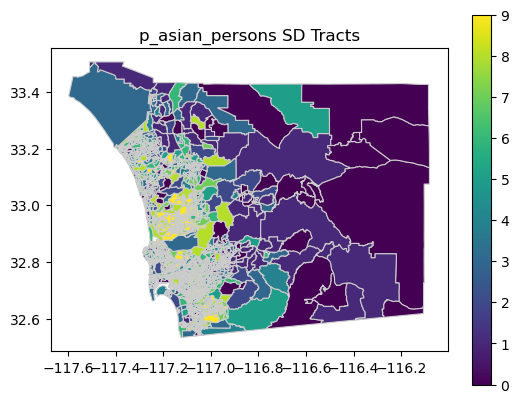

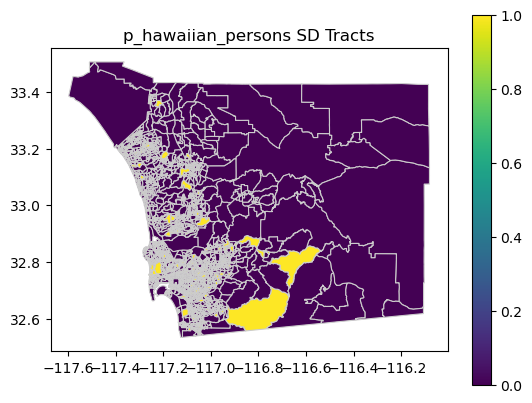

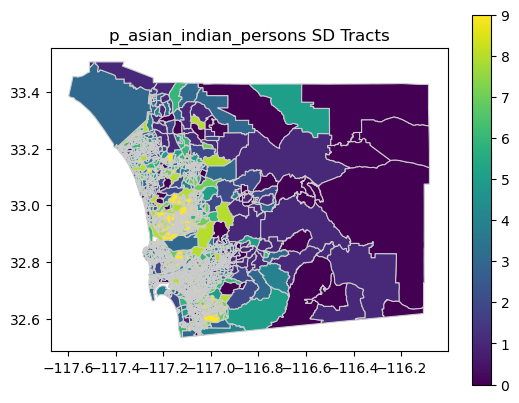

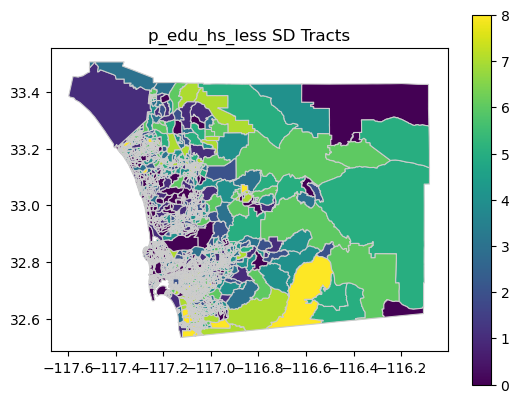

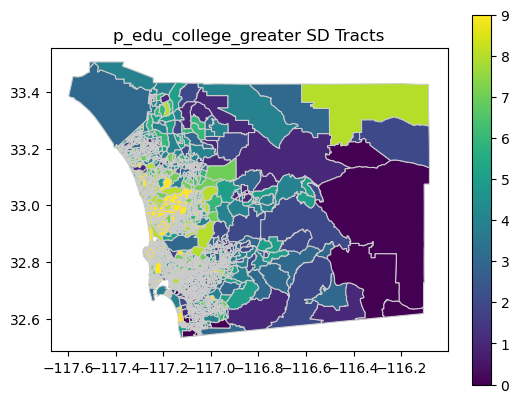

In [20]:
for var in acs_variables:
   
  sd_tracts[f'{var}_deciles'] = pd.qcut(sd_tracts[var], num_classes, labels=False, duplicates='drop')
    
 
  fig, ax = plt.subplots(1,1)
  sd_tracts.plot(column=f'{var}_deciles', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_title(f'{var} SD Tracts')
  plt.show()

In [29]:
lodes_variables = ['education_bachelors','education_hs','education_lths','education_some_college','employees_30_54','employees_55plus','employees_under_30','geoid']
num_classes = 10

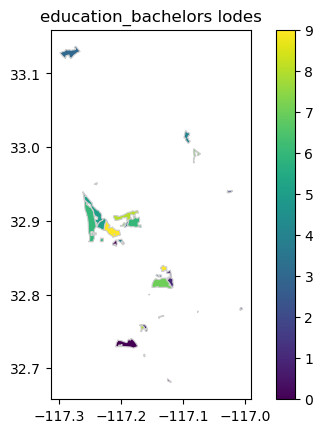

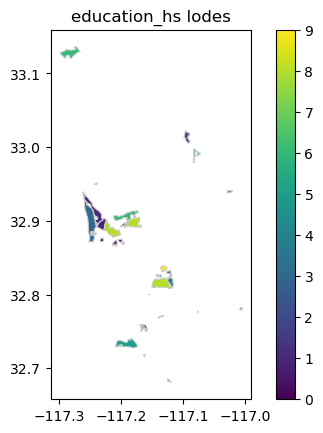

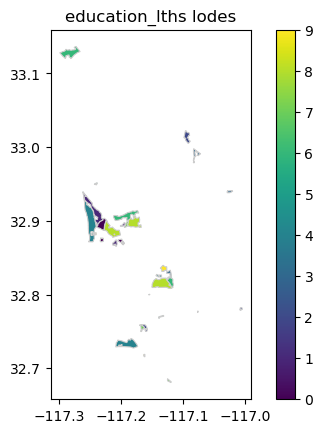

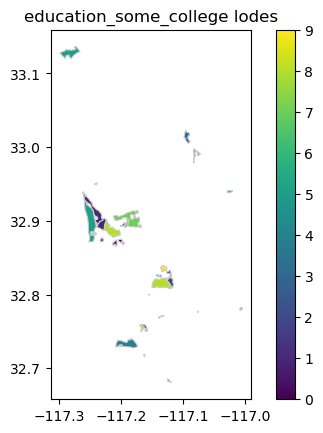

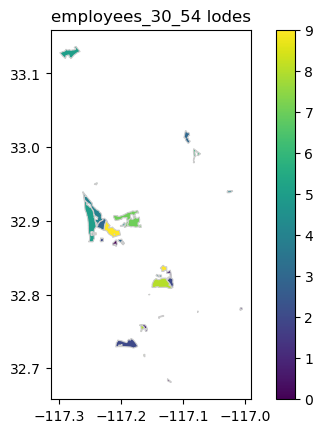

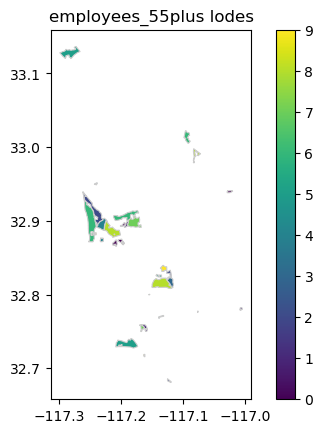

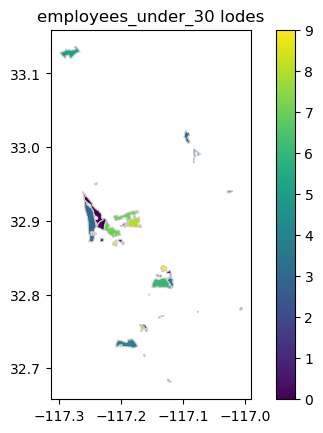

In [22]:
for var in lodes_variables:
   
  lodes[f'{var}_deciles'] = pd.qcut(lodes[var], num_classes, labels=False, duplicates='drop')
    
 
  fig, ax = plt.subplots(1,1)
  lodes.plot(column=f'{var}_deciles', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
  ax.set_title(f'{var} lodes')
  plt.show()

<Axes: >

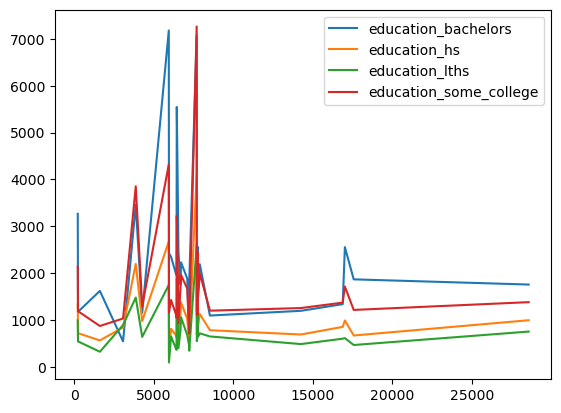

In [23]:
lodes[['education_bachelors','education_hs','education_lths','education_some_college']].plot()

In [34]:
lodes_demos

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid
214,3266.0,1347.0,990.0,2136.0,6017.0,1722.0,2256.0,060730004002000
229,1174.0,717.0,542.0,1187.0,2650.0,970.0,652.0,060730004004000
1604,1620.0,563.0,321.0,871.0,2272.0,1103.0,632.0,060730028011010
3062,542.0,840.0,891.0,1031.0,2316.0,988.0,844.0,060730038001018
3859,3459.0,2196.0,1479.0,3853.0,8092.0,2895.0,1468.0,060730053021009
4265,1152.0,975.0,638.0,1295.0,2719.0,1341.0,940.0,060730062001000
5937,7181.0,2678.0,1747.0,4321.0,12173.0,3754.0,5185.0,060730083051007
5948,2425.0,270.0,92.0,1152.0,2794.0,1145.0,324.0,060730083051018
6079,2347.0,812.0,646.0,1426.0,3788.0,1443.0,902.0,060730083121001
6410,1957.0,662.0,371.0,1095.0,3106.0,979.0,486.0,060730083391005


In [35]:
demographics

,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,geoid
0,21.483555,0.0,2.029391,0.839748,2.029391,3.050524,82.745472,060730001001
1,7.858546,0.0,5.762934,0.000000,5.762934,2.645051,77.303754,060730001002
2,1.070039,0.0,8.657588,0.000000,8.657588,2.948718,81.282051,060730002011
3,8.743169,0.0,3.122560,0.000000,3.122560,0.000000,71.321462,060730002012
4,14.860140,0.0,0.000000,0.000000,0.000000,9.262760,51.417769,060730002021
...,...,...,...,...,...,...,...,...
2053,16.328709,0.0,11.526147,0.000000,11.526147,2.820685,67.427804,060730221021
2054,5.982275,0.0,11.595273,0.000000,11.595273,2.485660,85.659656,060730221022
2055,17.501088,0.0,5.267741,0.000000,5.267741,7.040998,67.201426,060730221023
2056,75.200642,0.0,5.939005,0.000000,5.939005,51.790831,19.412607,060730221024


In [37]:
demographics.dropna()

,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,geoid
0,21.483555,0.0,2.029391,0.839748,2.029391,3.050524,82.745472,060730001001
1,7.858546,0.0,5.762934,0.000000,5.762934,2.645051,77.303754,060730001002
2,1.070039,0.0,8.657588,0.000000,8.657588,2.948718,81.282051,060730002011
3,8.743169,0.0,3.122560,0.000000,3.122560,0.000000,71.321462,060730002012
4,14.860140,0.0,0.000000,0.000000,0.000000,9.262760,51.417769,060730002021
...,...,...,...,...,...,...,...,...
2052,0.000000,0.0,18.850575,0.000000,18.850575,6.122449,17.857143,060730221012
2053,16.328709,0.0,11.526147,0.000000,11.526147,2.820685,67.427804,060730221021
2054,5.982275,0.0,11.595273,0.000000,11.595273,2.485660,85.659656,060730221022
2055,17.501088,0.0,5.267741,0.000000,5.267741,7.040998,67.201426,060730221023


In [38]:
demographics = demographics.dropna()

In [40]:
lodes_demos.merge(demographics, on='geoid')

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater


In [41]:
lgeoid = lodes_demos.geoid
dgeoid = demographics.geoid

In [42]:
lgeoid.head()

214     060730004002000
229     060730004004000
1604    060730028011010
3062    060730038001018
3859    060730053021009
Name: geoid, dtype: object

In [43]:
dgeoid.head()

0    060730001001
1    060730001002
2    060730002011
3    060730002012
4    060730002021
Name: geoid, dtype: object

In [44]:
len(dgeoid[0])

12

In [46]:
len(lgeoid.values[0])

15

In [47]:
short_geoid = [code[:12] for code in lgeoid.values]

In [48]:
short_geoid

['060730004002',
 '060730004004',
 '060730028011',
 '060730038001',
 '060730053021',
 '060730062001',
 '060730083051',
 '060730083051',
 '060730083121',
 '060730083391',
 '060730083391',
 '060730083391',
 '060730083462',
 '060730083462',
 '060730083501',
 '060730083502',
 '060730083692',
 '060730083762',
 '060730083763',
 '060730085111',
 '060730085111',
 '060730085113',
 '060730085113',
 '060730085113',
 '060730087021',
 '060730093074',
 '060730150022',
 '060730170492',
 '060730170561',
 '060730170711',
 '060730221012']

In [51]:
lodes_demos['shortgeoid']=short_geoid

/tmp/ipykernel_1170456/2478044967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodes_demos['shortgeoid']=short_geoid


In [52]:
lodes_demos

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid,shortgeoid
214,3266.0,1347.0,990.0,2136.0,6017.0,1722.0,2256.0,060730004002000,060730004002
229,1174.0,717.0,542.0,1187.0,2650.0,970.0,652.0,060730004004000,060730004004
1604,1620.0,563.0,321.0,871.0,2272.0,1103.0,632.0,060730028011010,060730028011
3062,542.0,840.0,891.0,1031.0,2316.0,988.0,844.0,060730038001018,060730038001
3859,3459.0,2196.0,1479.0,3853.0,8092.0,2895.0,1468.0,060730053021009,060730053021
4265,1152.0,975.0,638.0,1295.0,2719.0,1341.0,940.0,060730062001000,060730062001
5937,7181.0,2678.0,1747.0,4321.0,12173.0,3754.0,5185.0,060730083051007,060730083051
5948,2425.0,270.0,92.0,1152.0,2794.0,1145.0,324.0,060730083051018,060730083051
6079,2347.0,812.0,646.0,1426.0,3788.0,1443.0,902.0,060730083121001,060730083121
6410,1957.0,662.0,371.0,1095.0,3106.0,979.0,486.0,060730083391005,060730083391


In [57]:
lodes_acs=lodes_demos.merge(demographics, left_on='shortgeoid', right_on='geoid')

In [58]:
lodes_acs

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid_x,shortgeoid,p_hispanic_persons,p_native_persons,p_asian_persons,p_hawaiian_persons,p_asian_indian_persons,p_edu_hs_less,p_edu_college_greater,geoid_y
0,3266.0,1347.0,990.0,2136.0,6017.0,1722.0,2256.0,060730004002000,060730004002,13.447172,0.000000,16.969050,0.000000,16.969050,0.000000,61.388286,060730004002
1,1174.0,717.0,542.0,1187.0,2650.0,970.0,652.0,060730004004000,060730004004,20.452311,0.000000,11.799410,0.000000,11.799410,1.039261,64.896074,060730004004
2,1620.0,563.0,321.0,871.0,2272.0,1103.0,632.0,060730028011010,060730028011,17.220544,0.000000,8.836858,0.830816,8.836858,0.000000,50.523169,060730028011
3,542.0,840.0,891.0,1031.0,2316.0,988.0,844.0,060730038001018,060730038001,23.042338,1.255152,12.120644,0.309105,12.120644,0.000000,20.757082,060730038001
4,3459.0,2196.0,1479.0,3853.0,8092.0,2895.0,1468.0,060730053021009,060730053021,49.566528,0.263852,9.536374,0.000000,9.536374,34.201537,10.631939,060730053021
5,2347.0,812.0,646.0,1426.0,3788.0,1443.0,902.0,060730083121001,060730083121,8.728943,0.000000,10.413476,0.000000,10.413476,0.000000,100.000000,060730083121
6,1957.0,662.0,371.0,1095.0,3106.0,979.0,486.0,060730083391005,060730083391,10.738255,0.000000,26.006711,0.335570,26.006711,2.013423,69.031640,060730083391
7,2014.0,627.0,361.0,1048.0,2897.0,1153.0,525.0,060730083391018,060730083391,10.738255,0.000000,26.006711,0.335570,26.006711,2.013423,69.031640,060730083391
8,5547.0,1883.0,1231.0,3226.0,9104.0,2783.0,2154.0,060730083391034,060730083391,10.738255,0.000000,26.006711,0.335570,26.006711,2.013423,69.031640,060730083391
9,3247.0,1067.0,771.0,1768.0,5377.0,1476.0,1590.0,060730083462000,060730083462,8.688245,0.000000,19.931857,0.000000,19.931857,0.000000,88.045977,060730083462


<Axes: >

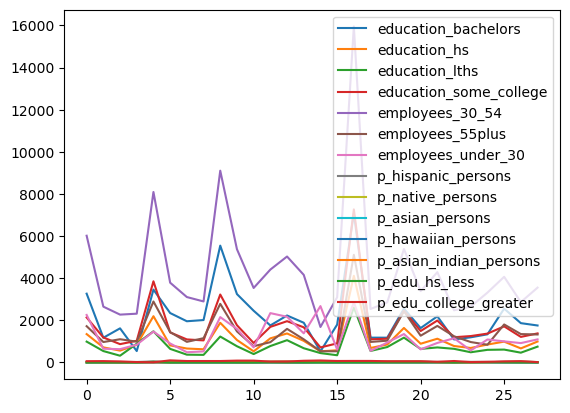

In [59]:
lodes_acs.plot()

In [64]:
import pandana as pdna
import geopandas as gpd
import os
if not os.path.exists('41740.h5'):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", "./41740.h5")
sd_network = pdna.Network.from_hdf5("41740.h5")

100%|██████████| 29.2M/29.2M [00:06<00:00, 4.32MB/s]


Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [65]:
from random import sample
from geosnap.analyze import isochrones_from_gdf

In [68]:
iso = isochrones_from_gdf(lodes,threshold=3000, network=sd_network) 

/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:140: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)


In [70]:
iso.explore()

In [73]:
lodes_to_plot=['education_bachelors','education_hs','education_lths','education_some_college']

In [90]:
acs_to_plot=['p_edu_hs_less','p_edu_college_greater']

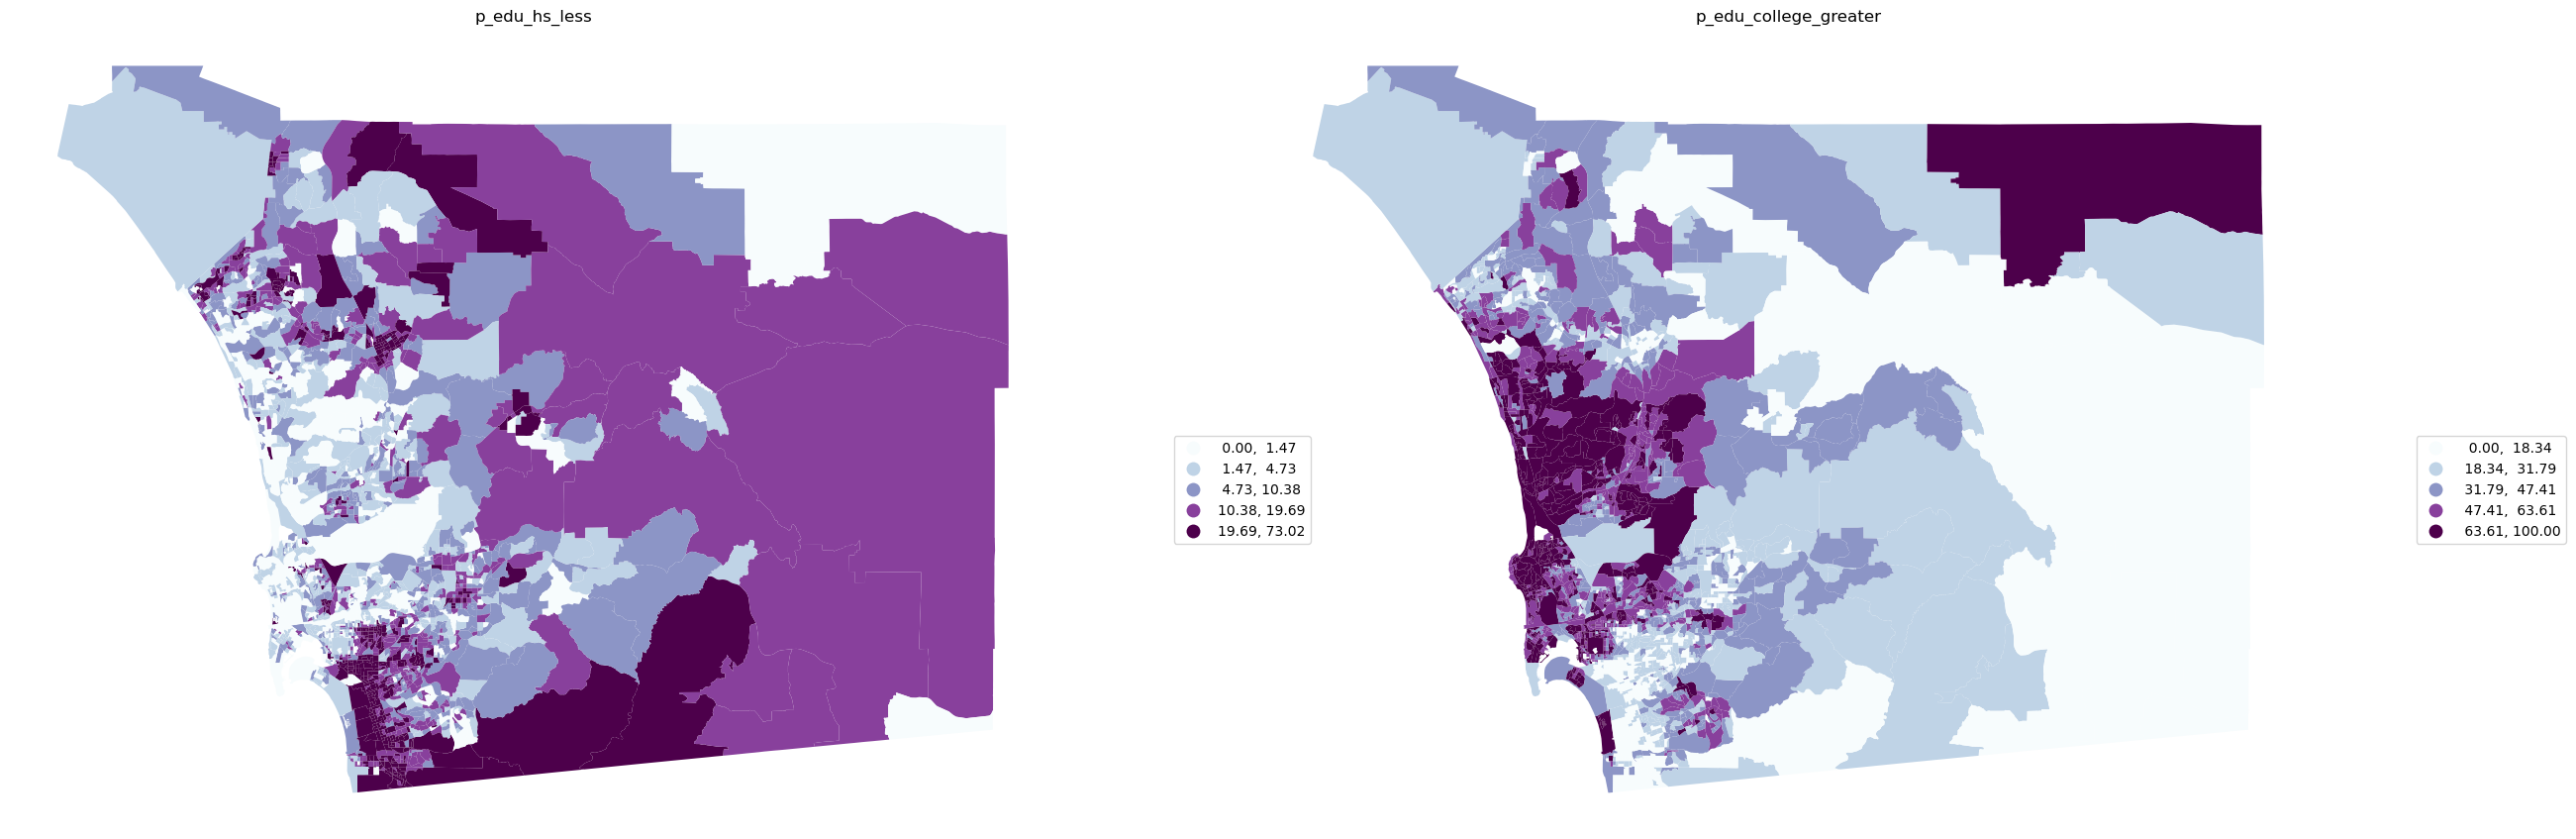

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(acs_to_plot):
    ax = axs[i]
    demographics.plot(column=col, ax=ax, scheme="Quantiles", cmap='BuPu', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)

plt.show()

In [118]:
#people living closer to the coast have higher education levels than people living more inland 
#concentration of employment centers is closer to coast 
#lode = people working - lodes for people w college or greater is also higher closer to employment centers 


In [105]:
lodes2=demographics.merge(lodes_demos, left_on='geoid', right_on='shortgeoid')

In [101]:
lodes_demos

,education_bachelors,education_hs,education_lths,education_some_college,employees_30_54,employees_55plus,employees_under_30,geoid,shortgeoid
214,3266.0,1347.0,990.0,2136.0,6017.0,1722.0,2256.0,060730004002000,060730004002
229,1174.0,717.0,542.0,1187.0,2650.0,970.0,652.0,060730004004000,060730004004
1604,1620.0,563.0,321.0,871.0,2272.0,1103.0,632.0,060730028011010,060730028011
3062,542.0,840.0,891.0,1031.0,2316.0,988.0,844.0,060730038001018,060730038001
3859,3459.0,2196.0,1479.0,3853.0,8092.0,2895.0,1468.0,060730053021009,060730053021
4265,1152.0,975.0,638.0,1295.0,2719.0,1341.0,940.0,060730062001000,060730062001
5937,7181.0,2678.0,1747.0,4321.0,12173.0,3754.0,5185.0,060730083051007,060730083051
5948,2425.0,270.0,92.0,1152.0,2794.0,1145.0,324.0,060730083051018,060730083051
6079,2347.0,812.0,646.0,1426.0,3788.0,1443.0,902.0,060730083121001,060730083121
6410,1957.0,662.0,371.0,1095.0,3106.0,979.0,486.0,060730083391005,060730083391


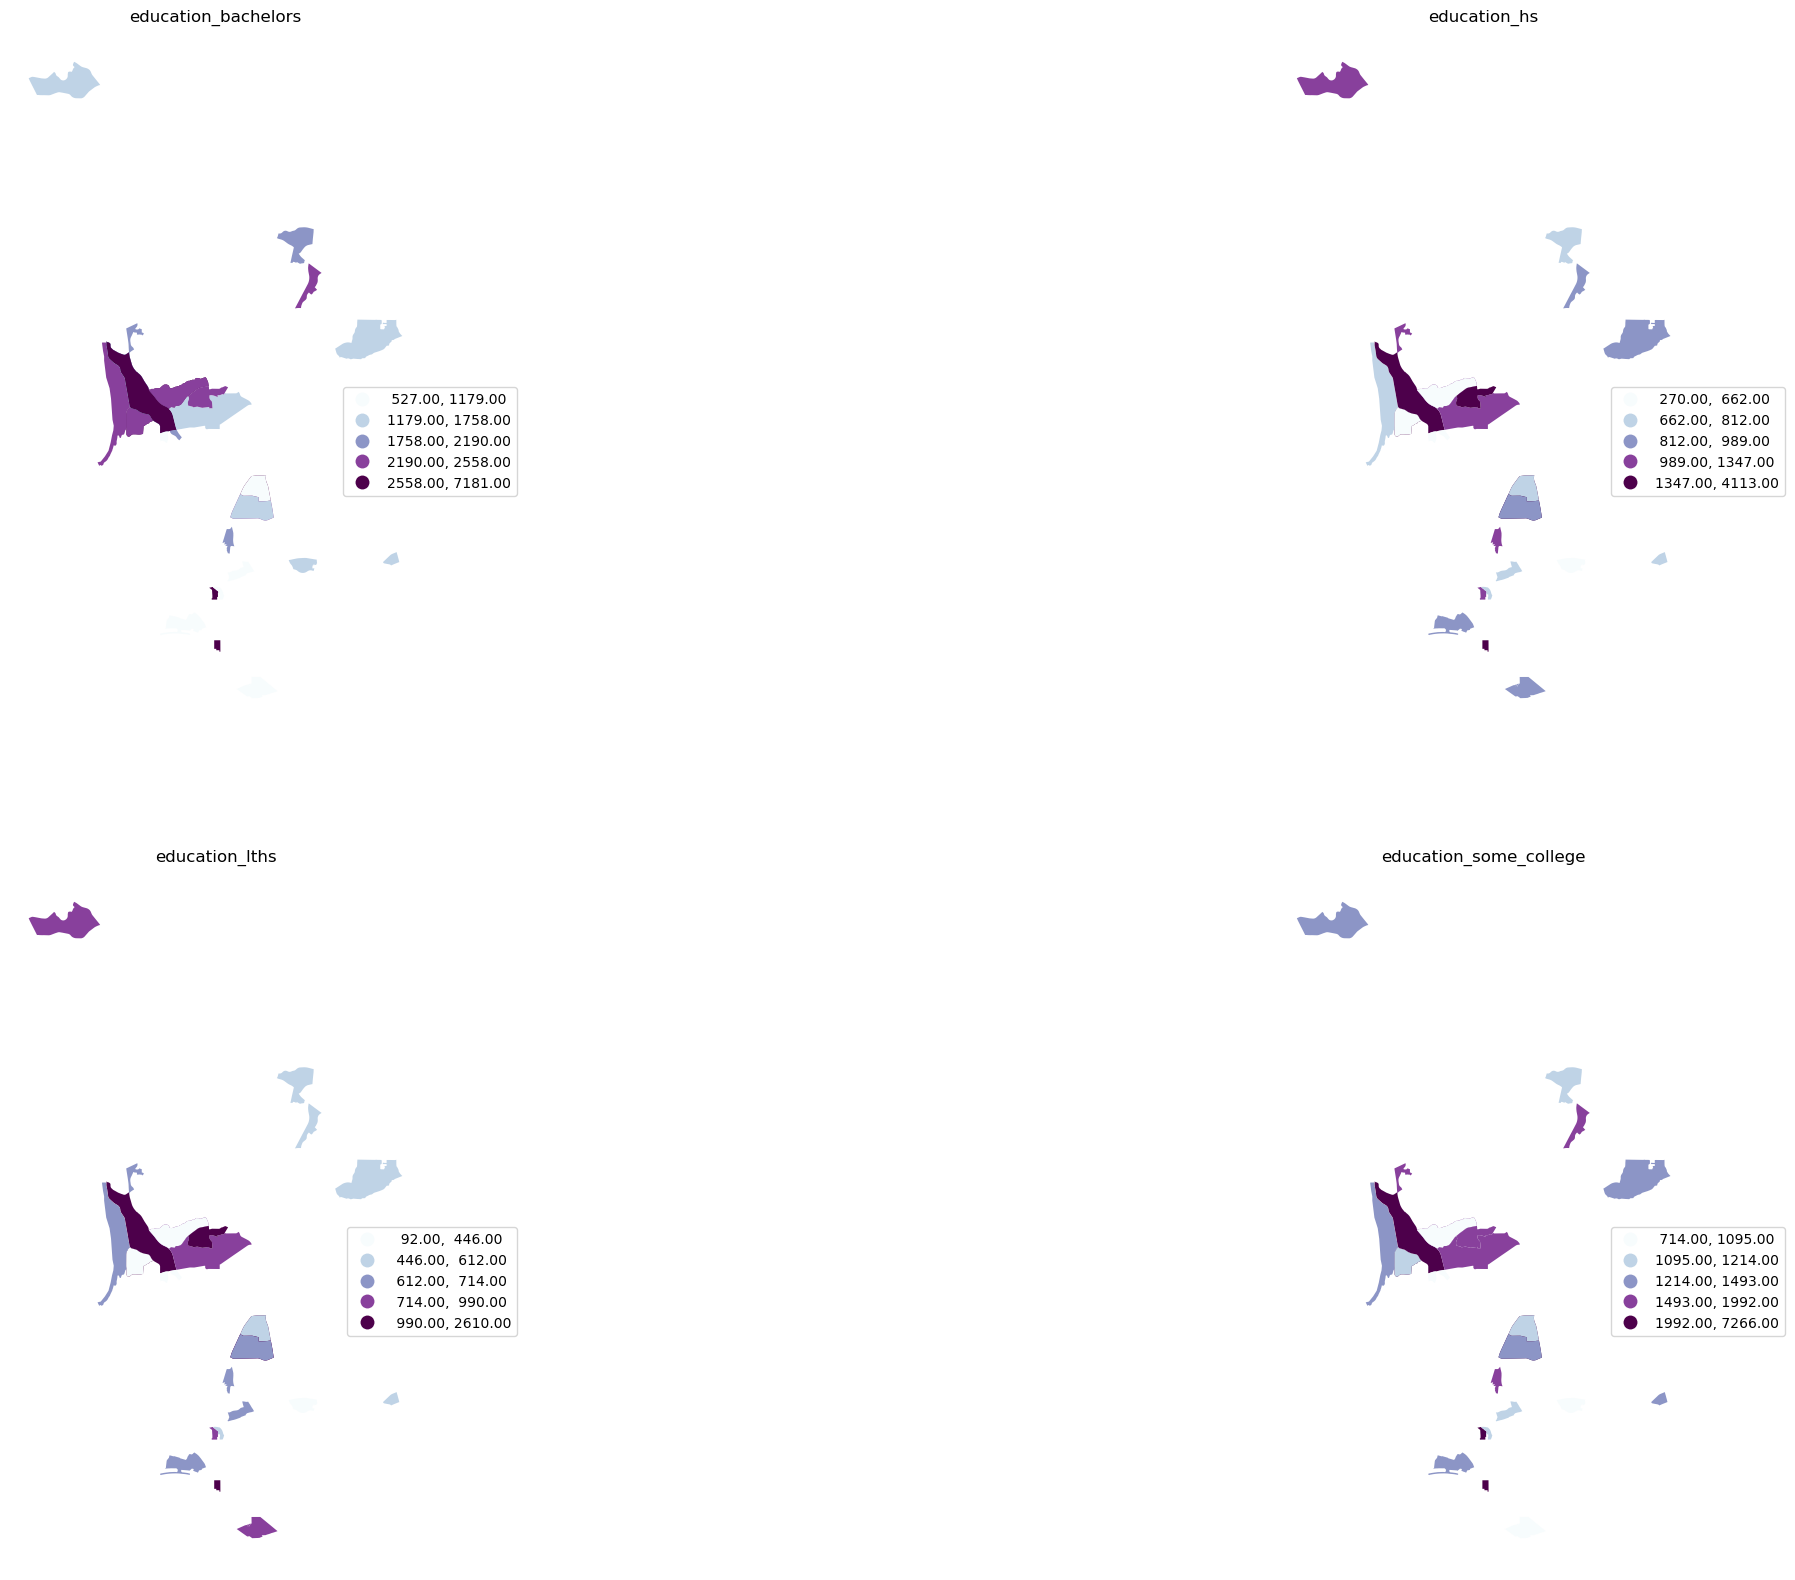

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs = axs.flatten()

for i, col in enumerate(lodes_to_plot):
    ax = axs[i]
    combined.plot(column=col, ax=ax, scheme="Quantiles", cmap='BuPu', legend=True, legend_kwds={"fmt": "{:.2f}", 'bbox_to_anchor': (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)

plt.show()

<Axes: >

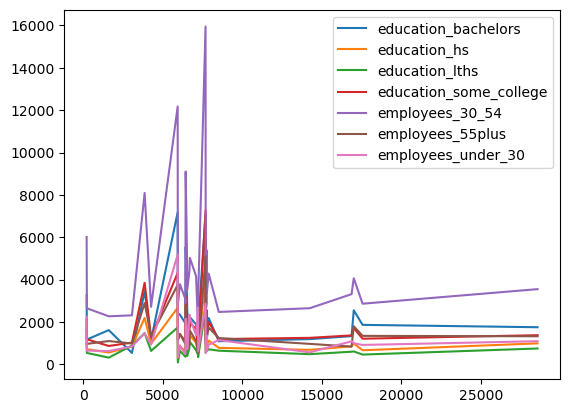

In [102]:
lodes_demos.plot()

<Axes: >

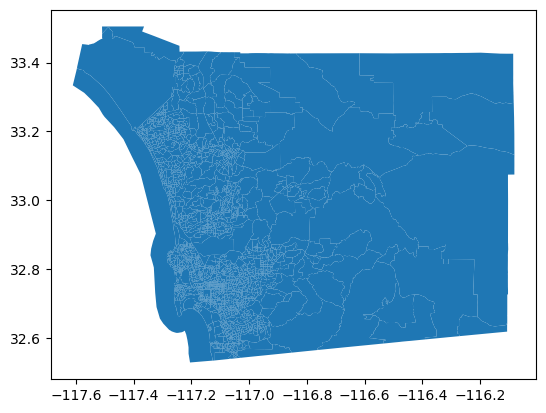

In [103]:
demographics.plot()

<Axes: >

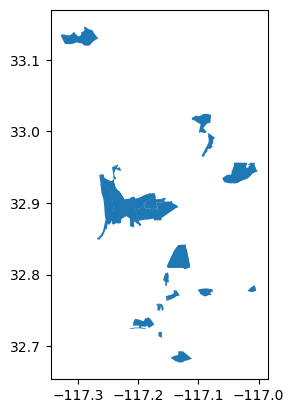

In [108]:
lodes2.plot()

In [109]:
combined = gpd.sjoin(lodes2,demographics, op='within')

/opt/tljh/user/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [111]:
combined.explore()

In [113]:
lodes2.explore()

In [ ]:
##the various maps shown above refelct the demographics in lodes(employees) and census (residents) and this helps to compare who is close to employment centers 